In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
rawdata=pd.read_csv("auction_nps (accessed 2018-06-22).csv")
rawdata.head()

participant.id_in_session participant.code participant.label  \
0                          1         amngp2fe             PC_11   
1                          2         w7r6euax             PC_14   
2                          1         amngp2fe             PC_11   
3                          2         w7r6euax             PC_14   
4                          1         amngp2fe             PC_11   

   participant._is_bot  participant._index_in_pages  \
0                    0                          368   
1                    0                          368   
2                    0                          368   
3                    0                          368   
4                    0                          368   

   participant._max_page_index participant._current_app_name  \
0                          368                   auction_nps   
1                          368                   auction_nps   
2                          368                   auction_nps   
3                          368                   auction_nps   
4                          368                   auction_nps   

   participant._round_number participant._current_page_name  \
0                         16                        Results   
1                         16                        Results   
2                         16                        Results   
3                         16                        Results   
4                         16                        Results   

  participant.ip_address       ...        group.id_in_subsession  \
0          192.168.1.111       ...                             1   
1          192.168.1.114       ...                             1   
2          192.168.1.111       ...                             1   
3          192.168.1.114       ...                             1   
4          192.168.1.111       ...                             1   

   subsession.round_number  subsession.treatment  session.code  session.label  \
0                        1                     0      ubhpnf4x            NaN   
1                        1                     0      ubhpnf4x            NaN   
2                        2                     0      ubhpnf4x            NaN   
3                        2                     0      ubhpnf4x            NaN   
4                        3                     0      ubhpnf4x            NaN   

   session.experimenter_name  session.mturk_HITId session.mturk_HITGroupId  \
0                        NaN                  NaN                      NaN   
1                        NaN                  NaN                      NaN   
2                        NaN                  NaN                      NaN   
3                        NaN                  NaN                      NaN   
4                        NaN                  NaN                      NaN   

   session.comment  session.is_demo  
0              NaN                0  
1              NaN                0  
2              NaN                0  
3              NaN                0  
4              NaN                0  

[5 rows x 75 columns]

In [41]:
n_rounds=rawdata['participant._round_number'].values.tolist()[0]
n_players=2
n_periods=3
bids=np.zeros((n_players*n_rounds,n_periods))
for i in range(n_rounds):
    subsessiondata=rawdata[rawdata['subsession.round_number']==i+1]
    for j in range(n_periods):
        bids[n_players*i,j]=subsessiondata[subsessiondata['player.cost_role']=='low_cost']['player.bid'+str(j+1)].values.tolist()[0]/(subsessiondata[subsessiondata['player.cost_role']=='high_cost']['player.cost'].values.tolist()[0])
        bids[n_players*i+1,j]=subsessiondata[subsessiondata['player.cost_role']=='low_cost']['player.opponent_bid'+str(j+1)].values.tolist()[0]/(subsessiondata[subsessiondata['player.cost_role']=='high_cost']['player.cost'].values.tolist()[0])
bids

array([[ 1.08108108,  1.07567568,  1.02702703],
       [ 1.08108108,  1.05135135,  1.05135135],
       [ 1.04166667,  1.02083333,  1.01041667],
       [ 1.04166667,  1.08333333,  1.01875   ],
       [ 1.19047619,  1.18095238,  1.14285714],
       [ 1.19047619,  1.19047619,  1.11428571],
       [ 1.        ,  0.98367347,  0.97142857],
       [ 1.12244898,  1.01020408,  1.00612245],
       [ 0.96551724,  0.96206897,  0.96551724],
       [ 1.26551724,  1.19310345,  1.        ],
       [ 0.90909091,  0.97727273,  0.97727273],
       [ 1.11136364,  1.01818182,  1.        ],
       [ 1.04166667,  1.10416667,  0.97916667],
       [ 1.14583333,  1.025     ,  1.01875   ],
       [ 1.33333333,  1.03333333,  1.        ],
       [ 1.11333333,  1.08666667,  1.02666667],
       [ 0.93617021,  0.91914894,  0.91489362],
       [ 1.12765957,  1.04255319,  1.01914894],
       [ 0.93414634,  0.92682927,  0.9195122 ],
       [ 1.2195122 ,  1.07317073,  1.02439024],
       [ 1.10416667,  1.08333333,  1.079

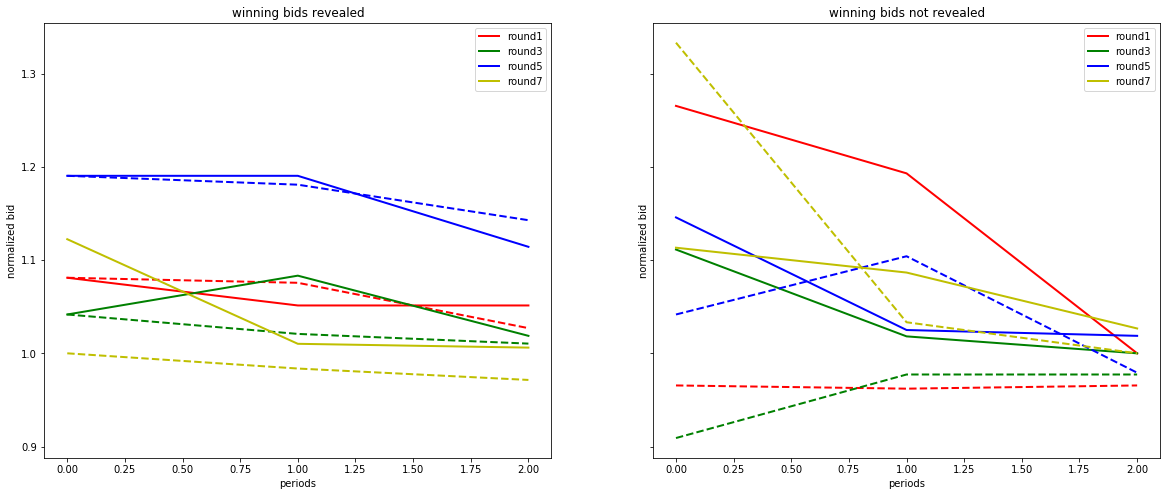

In [66]:
fig,ax=plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
cmap=['r','g','b','y','m','k','c','r']
k,j=0,0
for i in range(8):
    if i%2==0:
        ax[0].plot(bids[i,:],linewidth=2,linestyle='dashed',color=cmap[k])
        ax[1].plot(bids[i+8,:],linewidth=2,linestyle='dashed',color=cmap[j])
    else:
        ax[0].plot(bids[i,:],linewidth=2,color=cmap[k],label='round'+str(i))
        k=k+1
        ax[1].plot(bids[i+8,:],linewidth=2,color=cmap[j],label='round'+str(i))
        j=j+1



ax[0].set_title('winning bids revealed') 
ax[1].set_title('winning bids not revealed') 
ax[0].set_xlabel('periods')
ax[0].set_ylabel('normalized bid')
ax[1].set_xlabel('periods')
ax[1].set_ylabel('normalized bid')
ax[0].legend()
ax[1].legend()
plt.show()